# CS7641 Asignment 1 Breast Cancer Wisconsin dataset

by Varant Arabian (varabian3)

In [ ]:
# # mount google drive
# from google.colab import drive
# drive.mount('/content/gdrive')

In [ ]:
!mkdir -p plots
!mkdir -p plots/titanic
!mkdir -p plots/breast_cancer

# Import dependencies

In [ ]:
import os
import warnings
import numpy as np
import pandas as pd
import time

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve, validation_curve, StratifiedKFold, KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import check_random_state
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.exceptions import ConvergenceWarning
from sklearn.datasets import load_breast_cancer

from IPython.display import clear_output 

sns.set_theme(style="darkgrid")

# Breast Cancer Wisconsin dataset

In [ ]:
dataset_name = "breast_cancer"

In [ ]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [ ]:
X = data.data
y = data.target

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, shuffle=True, stratify=y
)
print(X_train.shape, X_test.shape)

(398, 30) (171, 30)


# Define methods and variables

In [ ]:
K_FOLDS = 10

In [ ]:
# adapted from https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    ylim=None,
    cv=None,
    n_jobs=None,
    scoring=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
    save_as=None
):
    ax = plt.gca()

    ax.set_title(title)
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        scoring=scoring,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    ax.plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    ax.plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    ax.legend(loc="best")

    if save_as:
        plt.savefig(save_as)

    return plt

In [ ]:
# adapted from https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
def plot_fit_time_vs_score(
    estimator,
    X,
    y,
    title="Performance of the model",
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    scoring=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
    save_as=None
):
    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        scoring=scoring,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    ax = plt.gca()

    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    ax.plot(fit_time_sorted, test_scores_mean_sorted, "o-")

    ax.set_xlabel("fit_times")
    ax.set_ylabel("Score")
    ax.set_title(title)

    if save_as:
        plt.savefig(save_as)

    return plt

In [ ]:
# adapted from https://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html
def plot_validation_curve(
    estimator,
    title,
    X,
    y,
    param_name,
    param_range,
    ylim=None,
    cv=None,
    use_semilogx=False,
    save_as=None
):
    train_scores, valid_scores = validation_curve(
        estimator, 
        X, 
        y, 
        param_name=param_name, 
        param_range=param_range,
        cv=cv
    )

    clear_output()

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    valid_scores_mean = np.mean(valid_scores, axis=1)
    valid_scores_std = np.std(valid_scores, axis=1)

    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel("Score")

    if ylim is not None:
        plt.ylim(*ylim)
    else:
        plt.ylim(0.0, 1.1)

    lw = 2

    if not use_semilogx:
        plt.plot(
            param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw
        )
        plt.plot(
            param_range, valid_scores_mean, label="Cross-validation score", color="navy", lw=lw
        )
    else:
        plt.semilogx(
            param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw
        )
        plt.semilogx(
            param_range, valid_scores_mean, label="Cross-validation score", color="navy", lw=lw
        )

    plt.legend(loc="best")

    if save_as:
        plt.savefig(save_as)

    return plt

In [ ]:
def find_best_params(estimator, X_train, y_train, param_grid, scoring_metric='accuracy', cv=10):
    grid_search = GridSearchCV(estimator, param_grid, scoring=scoring_metric, cv=cv)
    grid_search.fit(X_train, y_train)

    clf = grid_search.best_estimator_
    best_result = grid_search.best_score_

    # clear output
    from IPython.display import clear_output 
    clear_output()

    print("Best parameters", grid_search.best_params_)
    print("Training accuracy:", clf.score(X_train, y_train))
    print("Cross-validation accuracy:", best_result)

    results_df = pd.DataFrame(grid_search.cv_results_)
    results_df = results_df.sort_values(by=["rank_test_score"])
    results_df = results_df.set_index(
        results_df["params"].apply(lambda x: "_".join(str(val) for val in x.values()))
    ).rename_axis("kernel")

    # print()
    # print(results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]])

    return grid_search, results_df

In [ ]:
def train_and_test(estimator):
    estimator = KNeighborsClassifier(n_neighbors=11, metric='manhattan')

    start = time.time()
    dtree = estimator.fit(X_train, y_train)
    end = time.time()
    print("training time in seconds", end - start)

    y_pred = estimator.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"test accuracy: {acc}")
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
    print("Confusion matrix:")
    print(cm)

# Support Vector Machine

In [ ]:
# param_grid = [
#     {
#         'kernel': ['rbf'],
#         'C': [0.1, 1, 10, 100, 1000, 10000],
#         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
#     },
#     {
#         'kernel': ['poly'],
#         'C': [0.1, 1, 10, 100, 1000, 10000],
#         "degree": [2, 3, 4]
#     }
# ]

# grid_search, results_df = find_best_params(SVC(), X_train, y_train, param_grid, cv=K_FOLDS)
# results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]]

## Poly Kernel

Tune the hyperparameter C, the regularization parameter

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

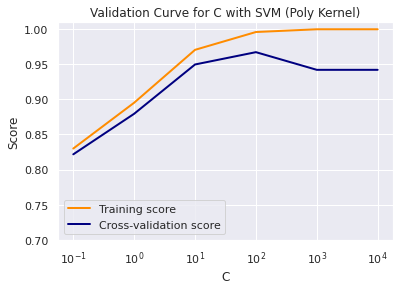

In [ ]:
plot_validation_curve(
    SVC(kernel='poly'), 
    "Validation Curve for C with SVM (Poly Kernel)", 
    X_train, 
    y_train, 
    param_name="C", 
    param_range=[0.1, 1, 10, 100, 1000, 10000], 
    ylim=(0.7, 1.01), 
    cv=K_FOLDS, 
    use_semilogx=True,
    save_as=f"./plots/{dataset_name}/svc_poly_validation_curve_c.png"
)

Tune degree

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

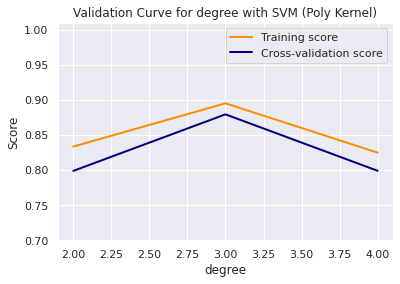

In [ ]:
plot_validation_curve(
    SVC(kernel='poly'), 
    "Validation Curve for degree with SVM (Poly Kernel)", 
    X_train, 
    y_train, 
    param_name="degree", 
    param_range=[2, 3, 4], 
    ylim=(0.7, 1.01), 
    cv=K_FOLDS, 
    use_semilogx=False,
    save_as=f"./plots/{dataset_name}/svc_poly_validation_curve_degree.png"
)

Plot learning curve

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

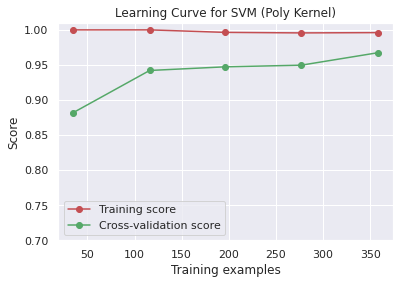

In [ ]:
plot_learning_curve(
    SVC(kernel='poly', C=100, degree=3), 
    "Learning Curve for SVM (Poly Kernel)", 
    X_train, 
    y_train, 
    ylim=(0.7, 1.01), 
    cv=K_FOLDS, 
    n_jobs=4,
    save_as=f"./plots/{dataset_name}/svc_poly_learning_curve.png"
)

Train

In [ ]:
svc_poly = SVC(kernel='poly', C=100, degree=3)

clear_output()

start = time.time()
dtree = svc_poly.fit(X_train, y_train)
end = time.time()
print(end - start)

0.0060062408447265625


## RBF Kernel

Tune the hyperparameter C, the regularization parameter

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

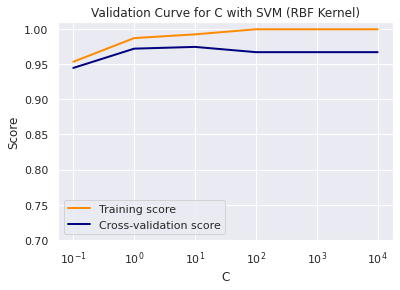

In [ ]:
plot_validation_curve(
    SVC(kernel='rbf'), 
    "Validation Curve for C with SVM (RBF Kernel)", 
    X_train, 
    y_train, 
    param_name="C", 
    param_range=[0.1, 1, 10, 100, 1000, 10000], 
    ylim=(0.7, 1.01), 
    cv=K_FOLDS, 
    use_semilogx=True,
    save_as=f"./plots/{dataset_name}/svc_rbf_validation_curve_c.png"
)

Tune the hyperparameter gamma

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

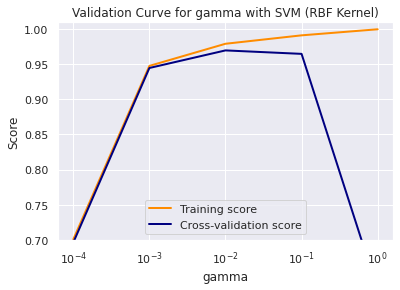

In [ ]:
plot_validation_curve(
    SVC(kernel='rbf'), 
    "Validation Curve for gamma with SVM (RBF Kernel)", 
    X_train, 
    y_train, 
    param_name="gamma", 
    param_range=[1, 0.1, 0.01, 0.001, 0.0001], 
    ylim=(0.7, 1.01), 
    cv=K_FOLDS, 
    use_semilogx=True,
    save_as=f"./plots/{dataset_name}/svc_rbf_validation_curve_gamma.png"
)

Plot learning curve

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

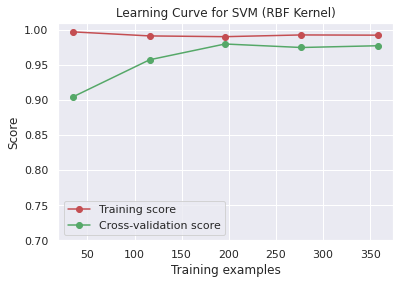

In [ ]:
plot_learning_curve(
    SVC(kernel='rbf', C=10, gamma=0.01), 
    "Learning Curve for SVM (RBF Kernel)", 
    X_train, 
    y_train, 
    ylim=(0.7, 1.01), 
    cv=K_FOLDS, 
    n_jobs=4,
    save_as=f"./plots/{dataset_name}/svc_rbf_learning_curve.png"
)

Train

In [ ]:
svc_rbf = SVC(kernel='rbf', C=100, gamma=0.01)

# clear output
from IPython.display import clear_output 
clear_output()

start = time.time()
dtree = svc_rbf.fit(X_train, y_train)
end = time.time()
print(end - start)

0.006826162338256836


## Test

In [ ]:
for name, clf in zip(['poly', 'rbf'], [svc_poly, svc_rbf]):
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} kernel test accuracy: {acc}")
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
    print("Confusion matrix:")
    print(cm)
    print()

poly kernel test accuracy: 0.9649122807017544
Confusion matrix:
[[ 58   6]
 [  0 107]]

rbf kernel test accuracy: 0.9766081871345029
Confusion matrix:
[[ 60   4]
 [  0 107]]



# K-Nearest Neighbors

## Tune hyperparameters

Tune the distance metric

In [ ]:
param_grid = {"metric": ['euclidean', 'manhattan'], "n_neighbors": [3, 5, 7, 11, 19]}
grid_search, results_df = find_best_params(KNeighborsClassifier(), X_train, y_train, param_grid, cv=K_FOLDS)
results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]]

Best parameters {'metric': 'euclidean', 'n_neighbors': 5}
Training accuracy: 0.9748743718592965
Cross-validation accuracy: 0.9698717948717949


,params,rank_test_score,mean_test_score,std_test_score
kernel,,,,
euclidean_5,"{'metric': 'euclidean', 'n_neighbors': 5}",1,0.969872,0.014959
euclidean_7,"{'metric': 'euclidean', 'n_neighbors': 7}",1,0.969872,0.014959
manhattan_3,"{'metric': 'manhattan', 'n_neighbors': 3}",3,0.969808,0.024590
euclidean_11,"{'metric': 'euclidean', 'n_neighbors': 11}",4,0.962308,0.020200
manhattan_11,"{'metric': 'manhattan', 'n_neighbors': 11}",4,0.962308,0.030133
euclidean_3,"{'metric': 'euclidean', 'n_neighbors': 3}",6,0.959808,0.016608
manhattan_5,"{'metric': 'manhattan', 'n_neighbors': 5}",6,0.959808,0.033924
manhattan_7,"{'metric': 'manhattan', 'n_neighbors': 7}",6,0.959808,0.030013
euclidean_19,"{'metric': 'euclidean', 'n_neighbors': 19}",9,0.957372,0.022402


Tune the hyperparameter k, the number of nearest neighbors

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

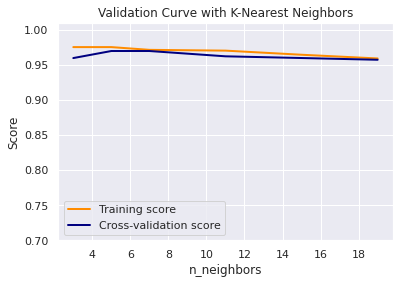

In [ ]:
plot_validation_curve(
    KNeighborsClassifier(), 
    "Validation Curve with K-Nearest Neighbors", 
    X_train, 
    y_train, 
    param_name="n_neighbors", 
    param_range=[3, 5, 7, 11, 15, 19], 
    ylim=(0.7, 1.01), 
    cv=K_FOLDS, 
    use_semilogx=False,
    save_as=f"./plots/{dataset_name}/knn_validation_curve_k.png"
)

## Plot learning curve

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

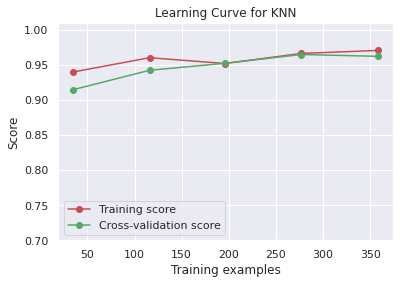

In [ ]:
plot_learning_curve(
    KNeighborsClassifier(n_neighbors=11, metric='euclidean'), 
    "Learning Curve for KNN", 
    X_train, 
    y_train, 
    ylim=(0.7, 1.01), 
    cv=K_FOLDS, 
    n_jobs=4,
    save_as=f"./plots/{dataset_name}/knn_learning_curve.png"
)

In [ ]:
# title = "Performance of KNN"
# plot_fit_time_vs_score(
#     estimator, X_train, y_train, title=title, ylim=(0.7, 1.01), cv=n_folds, n_jobs=4
# )

## Train and test

In [ ]:
train_and_test(KNeighborsClassifier(n_neighbors=11, metric='euclidean'))

training time in seconds 0.0006864070892333984
test accuracy: 0.9707602339181286
Confusion matrix:
[[ 59   5]
 [  0 107]]


# Decision Tree

In [ ]:
param_grid = {"max_depth": [2, 3, 5, 7, 10, 14], "min_samples_leaf": list(range(1, 15))}
grid_search, results_df = find_best_params(DecisionTreeClassifier(), X_train, y_train, param_grid, cv=K_FOLDS)
results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]]

Best parameters {'max_depth': 3, 'min_samples_leaf': 3}
Training accuracy: 0.9748743718592965
Cross-validation accuracy: 0.9448076923076922


,params,rank_test_score,mean_test_score,std_test_score
kernel,,,,
3_3,"{'max_depth': 3, 'min_samples_leaf': 3}",1,0.944808,0.033091
2_14,"{'max_depth': 2, 'min_samples_leaf': 14}",2,0.944744,0.034967
3_12,"{'max_depth': 3, 'min_samples_leaf': 12}",2,0.944744,0.038376
3_11,"{'max_depth': 3, 'min_samples_leaf': 11}",2,0.944744,0.038376
3_10,"{'max_depth': 3, 'min_samples_leaf': 10}",2,0.944744,0.038376
...,...,...,...,...
14_2,"{'max_depth': 14, 'min_samples_leaf': 2}",80,0.929615,0.035156
5_11,"{'max_depth': 5, 'min_samples_leaf': 11}",80,0.929615,0.029231
14_4,"{'max_depth': 14, 'min_samples_leaf': 4}",82,0.927244,0.039389


## Tune hyperparameters

Tune max_depth

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

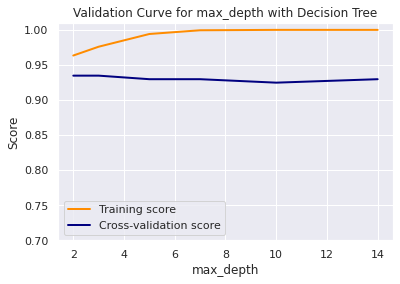

In [ ]:
plot_validation_curve(
    DecisionTreeClassifier(),
    "Validation Curve for max_depth with Decision Tree", 
    X_train, 
    y_train, 
    param_name="max_depth", 
    param_range=[2, 3, 5, 7, 10, 14], 
    ylim=(0.7, 1.01), 
    cv=K_FOLDS, 
    use_semilogx=False,
    save_as=f"./plots/{dataset_name}/dtree_validation_curve_max_depth.png"
)

Tune min_samples_leaf

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

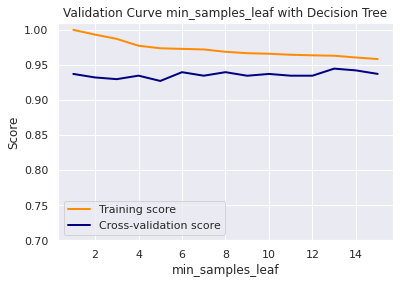

In [ ]:
plot_validation_curve(
    DecisionTreeClassifier(),
    "Validation Curve min_samples_leaf with Decision Tree", 
    X_train, 
    y_train, 
    param_name="min_samples_leaf", 
    param_range=list(range(1, 16)), 
    ylim=(0.7, 1.01), 
    cv=K_FOLDS, 
    use_semilogx=False,
    save_as=f"./plots/{dataset_name}/dtree_validation_curve_min_samples_leaf.png"
)

## Plot learning curve

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

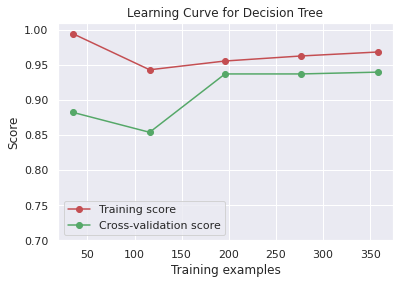

In [ ]:
plot_learning_curve(
    DecisionTreeClassifier(max_depth=10, min_samples_leaf=8), 
    "Learning Curve for Decision Tree", 
    X_train, 
    y_train, 
    ylim=(0.7, 1.01), 
    cv=K_FOLDS, 
    n_jobs=4,
    save_as=f"./plots/{dataset_name}/dtree_learning_curve.png"
)

In [ ]:
# estimator = DecisionTreeClassifier(max_depth=5, min_samples_leaf=1)
# title = "Performance of Decision Tree"
# plot_fit_time_vs_score(
#     estimator, X_train, y_train, title=title, ylim=(0.7, 1.01), cv=K_FOLDS, n_jobs=4
# )

## Train and test

In [ ]:
train_and_test(DecisionTreeClassifier(max_depth=10, min_samples_leaf=8))

training time in seconds 0.0007226467132568359
test accuracy: 0.9707602339181286
Confusion matrix:
[[ 59   5]
 [  0 107]]


# Decision Tree with AdaBoost

## Tune hyperparameters

Tune learning rate

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

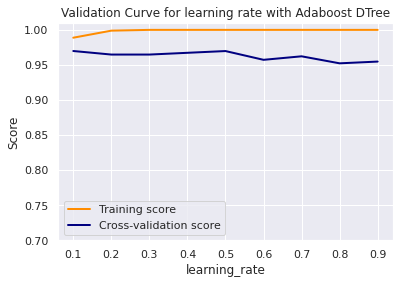

In [ ]:
plot_validation_curve(
    AdaBoostClassifier(),
    "Validation Curve for learning rate with Adaboost DTree", 
    X_train, 
    y_train, 
    param_name="learning_rate", 
    param_range=np.arange(0.1, 1, 0.1).tolist(), 
    ylim=(0.7, 1.01), 
    cv=K_FOLDS, 
    use_semilogx=False,
    save_as=f"./plots/{dataset_name}/boosting_validation_curve_learning_rate.png"
)

Tune n_estimators

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

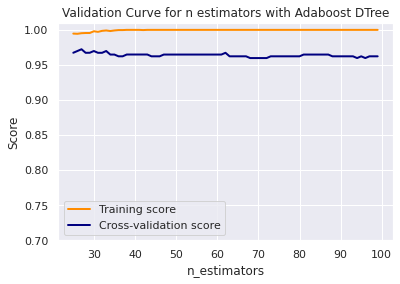

In [ ]:
plot_validation_curve(
    AdaBoostClassifier(learning_rate=0.3), 
    "Validation Curve for n estimators with Adaboost DTree", 
    X_train, 
    y_train, 
    param_name="n_estimators", 
    param_range=list(range(25, 100)), 
    ylim=(0.7, 1.01), 
    cv=K_FOLDS, 
    use_semilogx=False,
    save_as=f"./plots/{dataset_name}/boosting_validation_curve_n_estimators.png"
)

## Plot learning curve

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

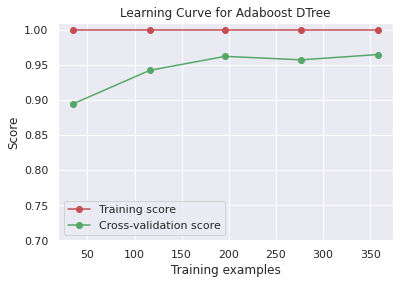

In [ ]:
plot_learning_curve(
    AdaBoostClassifier(learning_rate=0.3, n_estimators=50), 
    "Learning Curve for Adaboost DTree", 
    X_train, 
    y_train, 
    ylim=(0.7, 1.01), 
    cv=K_FOLDS, 
    n_jobs=4,
    save_as=f"./plots/{dataset_name}/boosting_learning_curve.png"
)

In [ ]:
# title = "Performance of Decision Tree"
# plot_fit_time_vs_score(
#     estimator, X_train, y_train, title=title, ylim=(0.7, 1.01), cv=n_folds, n_jobs=4
# )

## Train and test

In [ ]:
train_and_test(AdaBoostClassifier(learning_rate=0.3, n_estimators=50))

training time in seconds 0.001745462417602539
test accuracy: 0.9707602339181286
Confusion matrix:
[[ 59   5]
 [  0 107]]


# Multilayer Perceptron

## Tune hyperparameters

Tune learning_rate

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

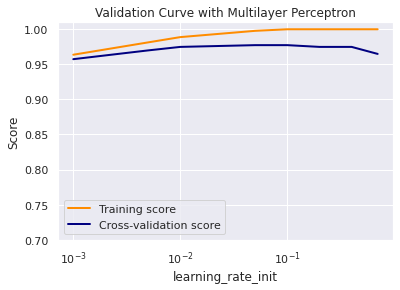

In [ ]:
estimator = MLPClassifier(random_state=1, solver='sgd')

title = "Validation Curve with Multilayer Perceptron"
param_name = "learning_rate_init"
# param_range = np.arange(0.001, 0.01, 0.001).tolist()
param_range = [0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.4, 0.7]

fig = None

with warnings.catch_warnings():
    warnings.filterwarnings(
        "ignore", category=ConvergenceWarning, module="sklearn"
    )
    fig = plot_validation_curve(
        estimator, title, X_train, y_train, param_name, param_range, ylim=(0.7, 1.01), cv=K_FOLDS, use_semilogx=True
    )
    plt.savefig(f"./plots/{dataset_name}/mlp_validation_curve_lr.png")

fig

Tune hidden_layer_sizes

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

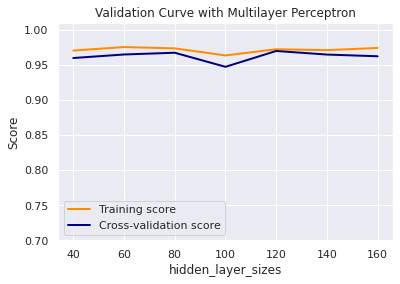

In [ ]:
estimator = MLPClassifier(random_state=1, learning_rate_init=0.001, solver='sgd')

title = "Validation Curve with Multilayer Perceptron"
param_name = "hidden_layer_sizes"
param_range = [(n,) for n in range(40, 161, 20)]

fig = None

with warnings.catch_warnings():
    warnings.filterwarnings(
        "ignore", category=ConvergenceWarning, module="sklearn"
    )
    fig = plot_validation_curve(
        estimator, title, X_train, y_train, param_name, param_range, ylim=(0.7, 1.01)
    )
    plt.savefig(f"./plots/{dataset_name}/mlp_validation_curve_hidden_layers.png")

fig

## Plot learning curve

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

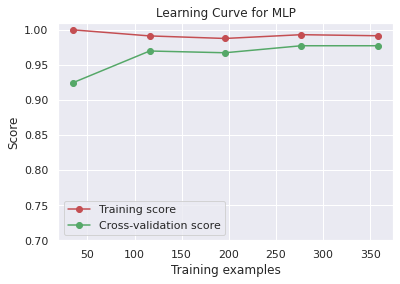

In [ ]:
mlp = MLPClassifier(random_state=1, hidden_layer_sizes=(120,), learning_rate_init=0.01, solver='sgd')

title = "Learning Curve for MLP"
fig = plot_learning_curve(
    mlp, title, X_train, y_train, ylim=(0.7, 1.01), cv=K_FOLDS, n_jobs=4
)
plt.savefig(f"./plots/{dataset_name}/mlp_learning_curve.png")
fig

In [ ]:
# title = "Performance of MLP"
# plot_fit_time_vs_score(
#     mlp, X_train, y_train, title=title, ylim=(0.7, 1.01), cv=K_FOLDS, n_jobs=4
# )

## Plot loss curve

In [ ]:
# mlp = MLPClassifier(random_state=1, hidden_layer_sizes=(100,), learning_rate_init=0.001)

# with warnings.catch_warnings():
#     warnings.filterwarnings(
#         "ignore", category=ConvergenceWarning, module="sklearn"
#     )
#     mlp.fit(X_train, y_train)
#     # cv_results = cross_validate(mlp, X_train, y_train, cv=n_folds)
#     # print(sorted(cv_results.keys()))

# plt.title("Loss Curve for Multilayer Perceptron")
# plt.plot(mlp.loss_curve_)

In [ ]:
# lrs = [0.001, 0.005, 0.1, 0.2]
# mlps = []
# for lr in lrs:
#     mlp = MLPClassifier(random_state=1, hidden_layer_sizes=(100,), learning_rate_init=lr)
#     with warnings.catch_warnings():
#         warnings.filterwarnings(
#             "ignore", category=ConvergenceWarning, module="sklearn"
#         )
#         mlp.fit(X_train, y_train)
#     mlps.append(mlp)


# fig, ax = plt.subplots()
# plt.title("Loss Curve for Multilayer Perceptron")
# for mlp, lr in zip(mlps, lrs):
#     ax.plot(mlp.loss_curve_, label=f"learning_rate_init = {lr}")
# ax.legend(loc="best")

In [ ]:
# n_hidden_layers = list(range(50, 151, 20))
# mlps = []
# for n in n_hidden_layers:
#     mlp = MLPClassifier(random_state=1, hidden_layer_sizes=(n,), learning_rate_init=0.005)
#     with warnings.catch_warnings():
#         warnings.filterwarnings(
#             "ignore", category=ConvergenceWarning, module="sklearn"
#         )
#         mlp.fit(X_train, y_train)
#     mlps.append(mlp)


# fig, ax = plt.subplots()
# plt.title("Loss Curve for Multilayer Perceptron")
# for mlp, n in zip(mlps, n_hidden_layers):
#     ax.plot(mlp.loss_curve_, label=f"hidden_layers = {n}")
# ax.legend(loc="best")

## Train and test

In [ ]:
mlp = MLPClassifier(random_state=1, hidden_layer_sizes=(120,), learning_rate_init=0.01, solver='sgd')
with warnings.catch_warnings():
    warnings.filterwarnings(
        "ignore", category=ConvergenceWarning, module="sklearn"
    )
    mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"test accuracy: {acc}")
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
cm

test accuracy: 0.9883040935672515


array([[ 62,   2],
       [  0, 107]])

In [ ]:
# !cp -r plots/$dataset_name/*.png /content/gdrive/MyDrive/plots/$dataset_name